# Kelompok: The Insomniacs
# Kelas: Data Science Batch 19A
# Nama Anggota:
###    1. Vannessa Yoanita Oktorio Naibaho
###    2. Shindy Atila Putri
###    3. Rizki Amanda Putri
###    4. Ebit Nur Alam
###    5. Qonita Sungsang
###    6. Ulfathea Mulyadita
###    7. Muhammad Hafiz Abdul Aziz

In [194]:
# Pandas dan Numpy
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

#Statistic Library
import scipy.stats as st
from scipy.stats import chi2_contingency
import statsmodels.stats.proportion as sp

In [195]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
sns.set_theme()
%config InlineBackend.figure_format = 'retina'

import scipy.stats as stats
import pylab
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,classification_report,precision_recall_curve,confusion_matrix,roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRFClassifier
from sklearn.neural_network import MLPClassifier
filterwarnings('ignore')

In [196]:
from google.colab import files
file = files.upload()

Saving train.csv to train.csv


In [197]:
import io
df = pd.read_csv(io.StringIO(file['train.csv'].decode('utf-8')))
print(df)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_

# **1. Data Cleansing**

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [199]:
df.describe(include = [np.number])

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [200]:
df.describe(include = [object])

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


## A. Handle Missing Values

In [201]:
print("Kolom yang memiliki missing value adalah :")
df.columns[df.isnull().any()].tolist()

Kolom yang memiliki missing value adalah :


[]

## B. Handle Duplicated Data

In [202]:
df.duplicated().sum()

0

## C. Handle Outliers

In [203]:
num = ['Age', 'Annual_Premium', 'Vintage']
cat = ['Gender', 'Driving_License', 'Policy_Sales_Channel', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']

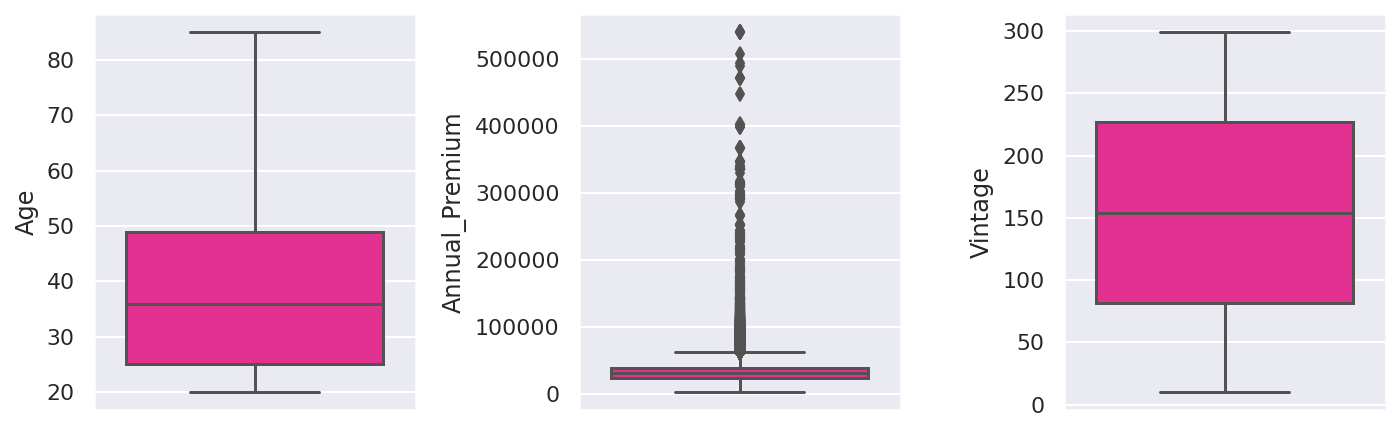

In [204]:
feature = num
plt.figure(figsize=(20, 15))
for i in range(0, len(feature)):
    plt.subplot(5, 6,  i+1)
    sns.boxplot(y=df[feature[i]], color='deeppink', orient='v')
    plt.tight_layout()

### Z-Score

In [205]:
from scipy import stats

In [206]:
z_scores = np.abs(stats.zscore(df['Annual_Premium']))
filtered_entriess = (z_scores < 3)
df = df[filtered_entriess]

In [207]:
df.describe(include = [np.number])

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,379026.000000,379026.000000,379026.000000,379026.000000,379026.000000,379026.000000,379026.000000,379026.000000,379026.000000
mean,190529.032642,38.798666,0.997879,26.397751,0.458293,30122.633666,112.118456,154.351290,0.122387
std,110023.715172,15.498744,0.046008,13.245187,0.498258,15695.692881,54.175411,83.669968,0.327733
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95248.250000,25.000000,1.000000,15.000000,0.000000,24346.000000,29.000000,82.000000,0.000000
50%,190515.500000,36.000000,1.000000,28.000000,0.000000,31594.000000,136.000000,154.000000,0.000000
75%,285804.750000,49.000000,1.000000,35.000000,1.000000,39230.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,82202.000000,163.000000,299.000000,1.000000


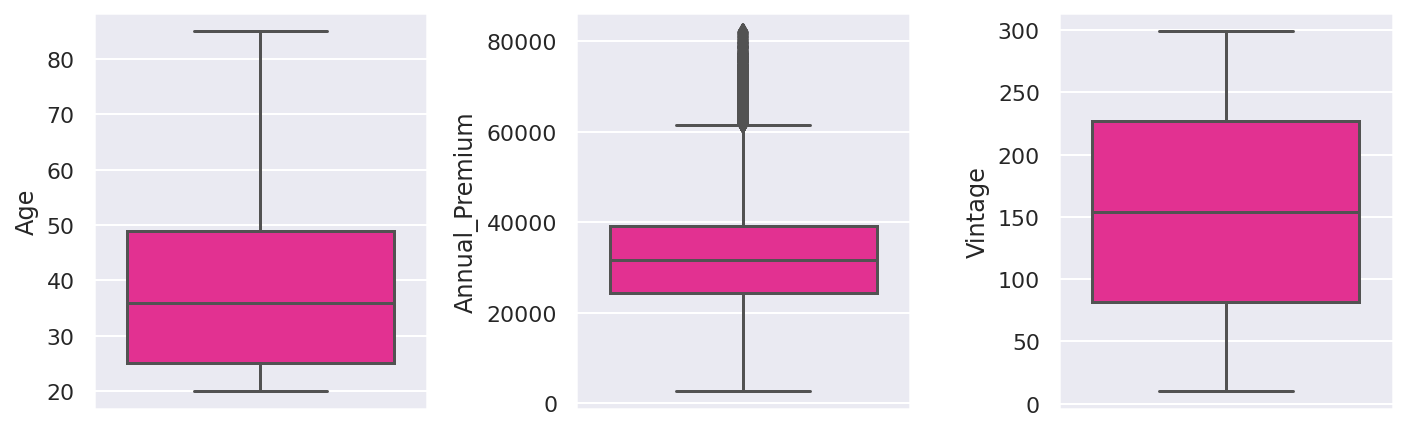

In [208]:
feature = num
plt.figure(figsize=(20, 15))
for i in range(0, len(feature)):
    plt.subplot(5, 6,  i+1)
    sns.boxplot(y=df[feature[i]], color='deeppink', orient='v')
    plt.tight_layout()

### IQR

In [209]:
Q1 = df['Annual_Premium'].quantile(0.25)
Q3 = df['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1
IQR

14884.0

In [210]:
low = Q1 - (1.5 * IQR)
high = Q3 + (1.5 * IQR)
filtered_entries = ((df['Annual_Premium'] >= low) & (df['Annual_Premium'] <= high))
df = df[filtered_entries]
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [211]:
df.describe(include = [np.number])

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,370466.000000,370466.000000,370466.000000,370466.000000,370466.000000,370466.000000,370466.000000,370466.000000,370466.000000
mean,190535.142323,38.665297,0.997943,26.438356,0.459710,29236.338970,112.557131,154.342110,0.121744
std,110033.513932,15.437350,0.045306,13.313633,0.498375,14718.271269,54.035058,83.670536,0.326990
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95217.250000,25.000000,1.000000,15.000000,0.000000,24094.000000,30.000000,82.000000,0.000000
50%,190532.500000,36.000000,1.000000,28.000000,0.000000,31309.000000,151.000000,154.000000,0.000000
75%,285818.750000,49.000000,1.000000,36.000000,1.000000,38571.750000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,61556.000000,163.000000,299.000000,1.000000


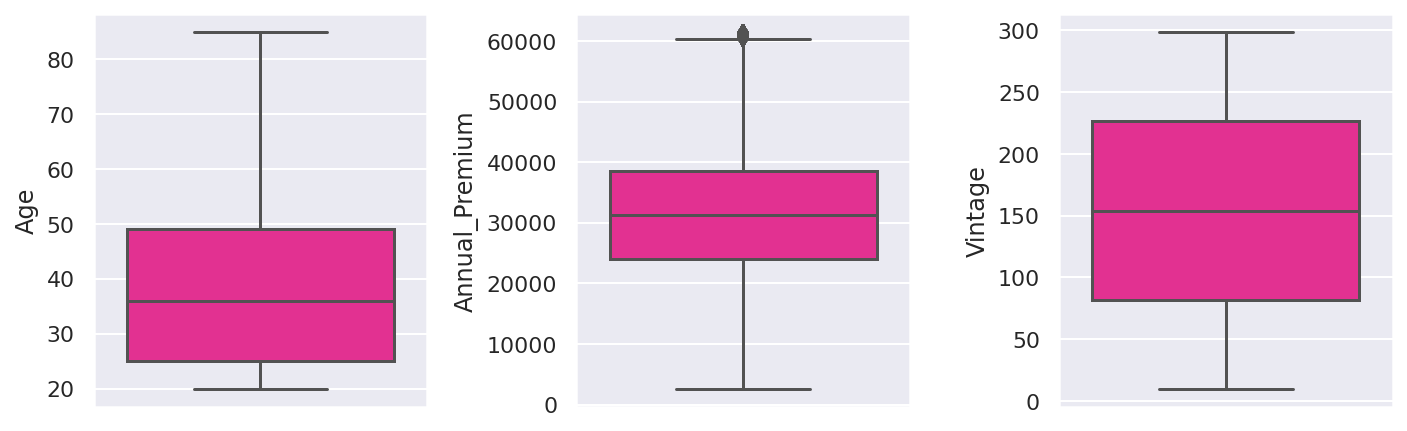

In [212]:
feature = num
plt.figure(figsize=(20, 15))
for i in range(0, len(feature)):
    plt.subplot(5, 6,  i+1)
    sns.boxplot(y=df[feature[i]], color='deeppink', orient='v')
    plt.tight_layout()

## D. Feature Transformation

## Standarization and Normalization

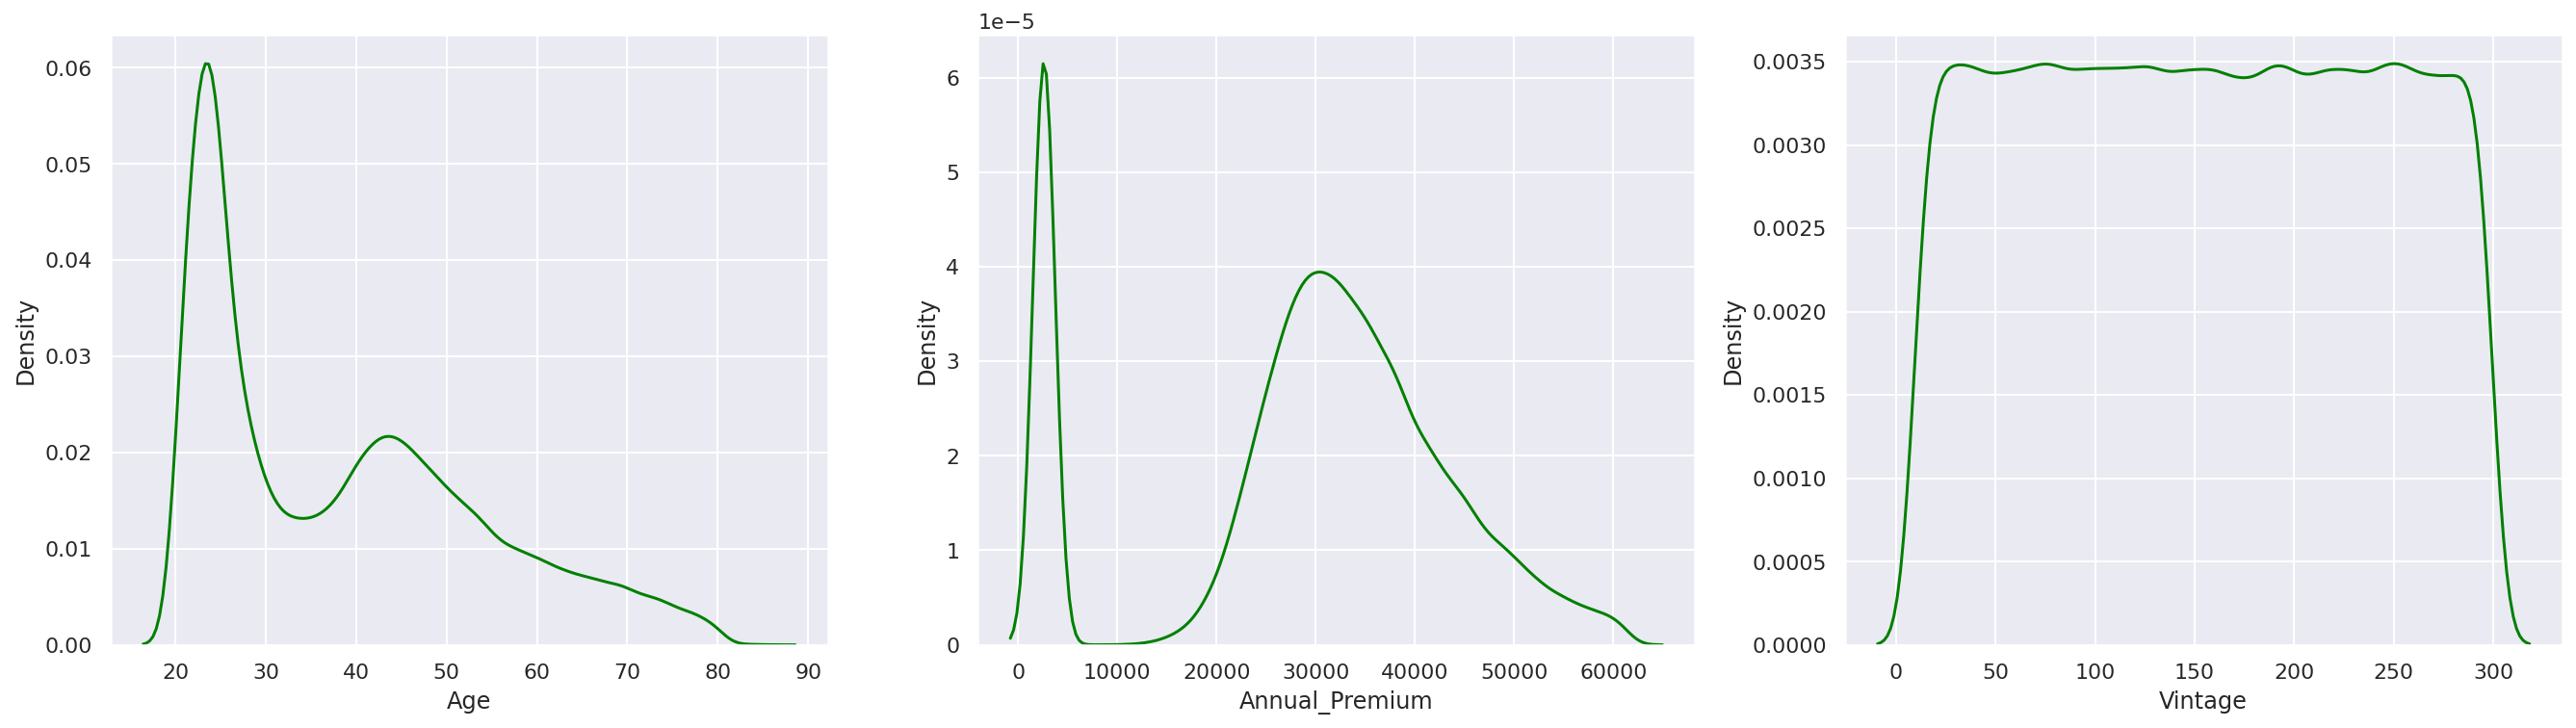

In [213]:
features = num
plt.figure(figsize=(25, 10))
for i in range(0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

### Vintage

In [214]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df['Vintage_std'] = StandardScaler().fit_transform(df['Vintage'].values.reshape(len(df), 1))
df['Vintage_norm'] = MinMaxScaler().fit_transform(df['Vintage'].values.reshape(len(df), 1))

In [215]:
df[['Vintage', 'Vintage_std', 'Vintage_norm']].describe()

,Vintage,Vintage_std,Vintage_norm
count,370466.000000,3.704660e+05,370466.000000
mean,154.342110,-5.440922e-17,0.499454
std,83.670536,1.000001e+00,0.289517
min,10.000000,-1.725127e+00,0.000000
25%,82.000000,-8.646079e-01,0.249135
50%,154.000000,-4.088777e-03,0.498270
75%,227.000000,8.683820e-01,0.750865
max,299.000000,1.728901e+00,1.000000


In [216]:
cek_vin = ['Vintage', 'Vintage_std', 'Vintage_norm']

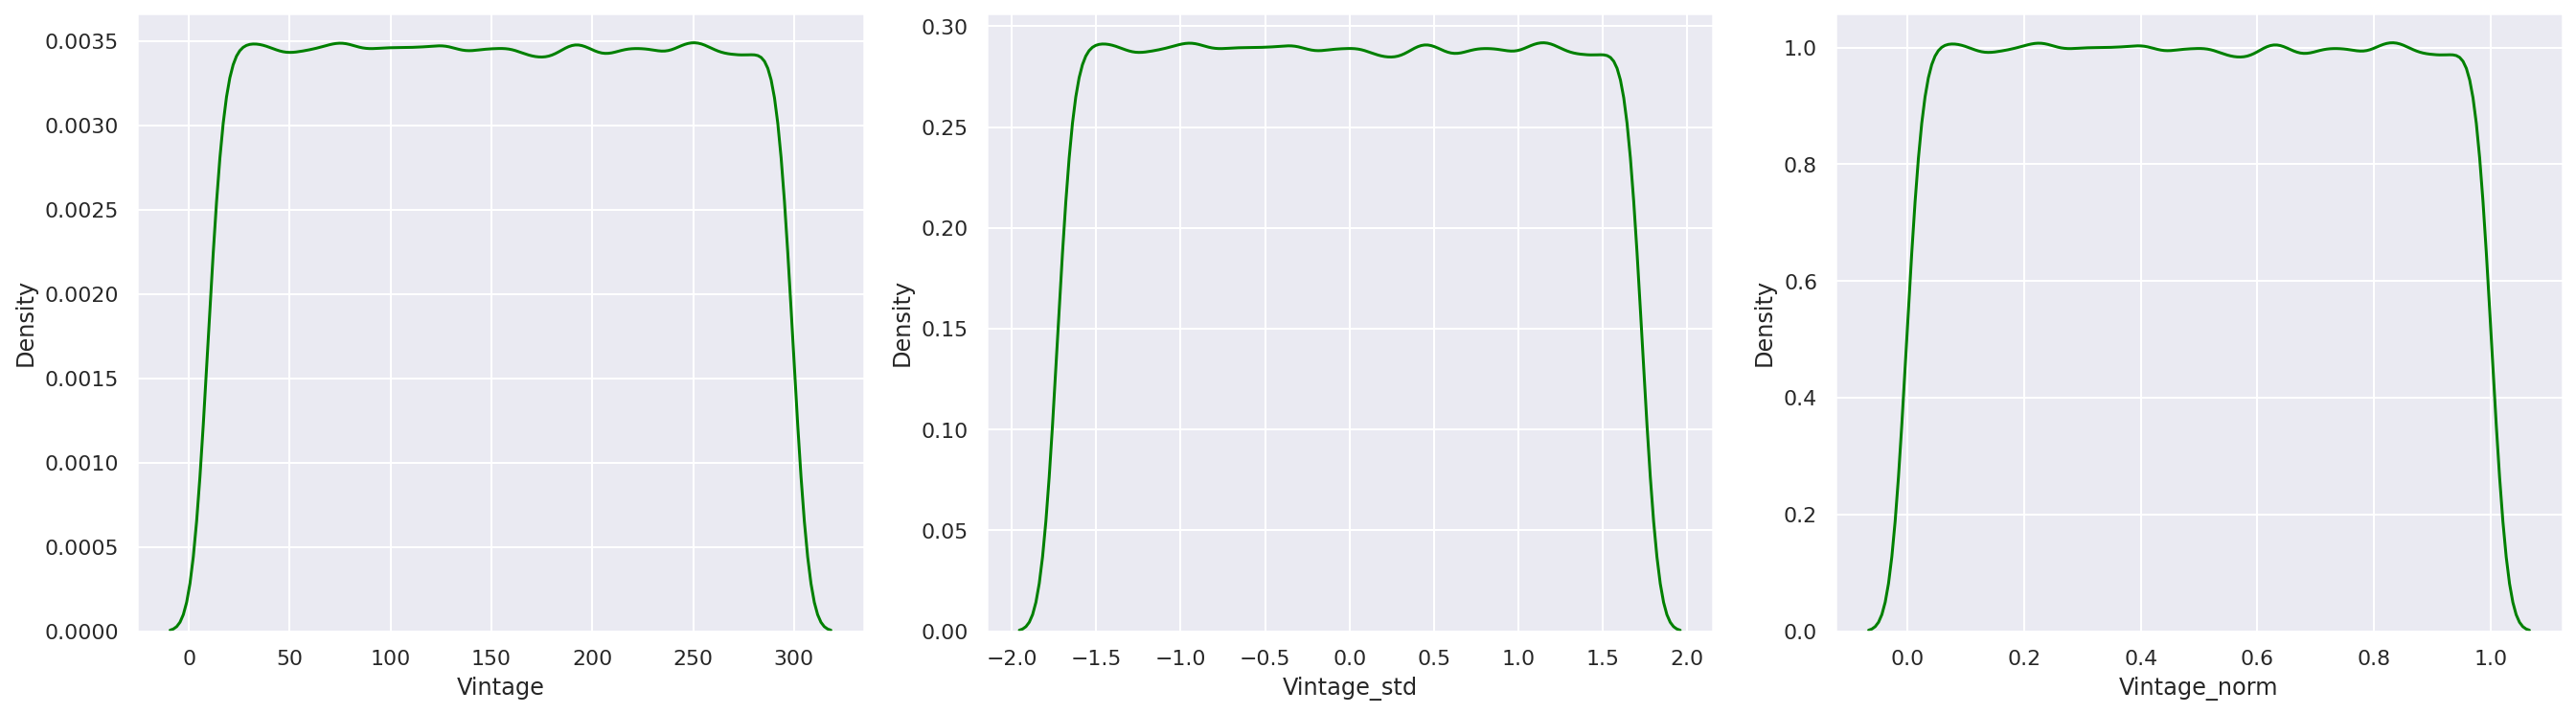

In [217]:
feat = cek_vin
plt.figure(figsize=(25, 10))
for i in range(0, len(feat)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[feat[i]], color='green')
    plt.xlabel(feat[i])
    plt.tight_layout()

Sementara data vintage belum ditransformasi, akan ditentukan setelah dicobakan pada machine learning pada tahapan selanjutnya

## Log Transformation

In [218]:
cek_log = ['Age', 'Annual_Premium']

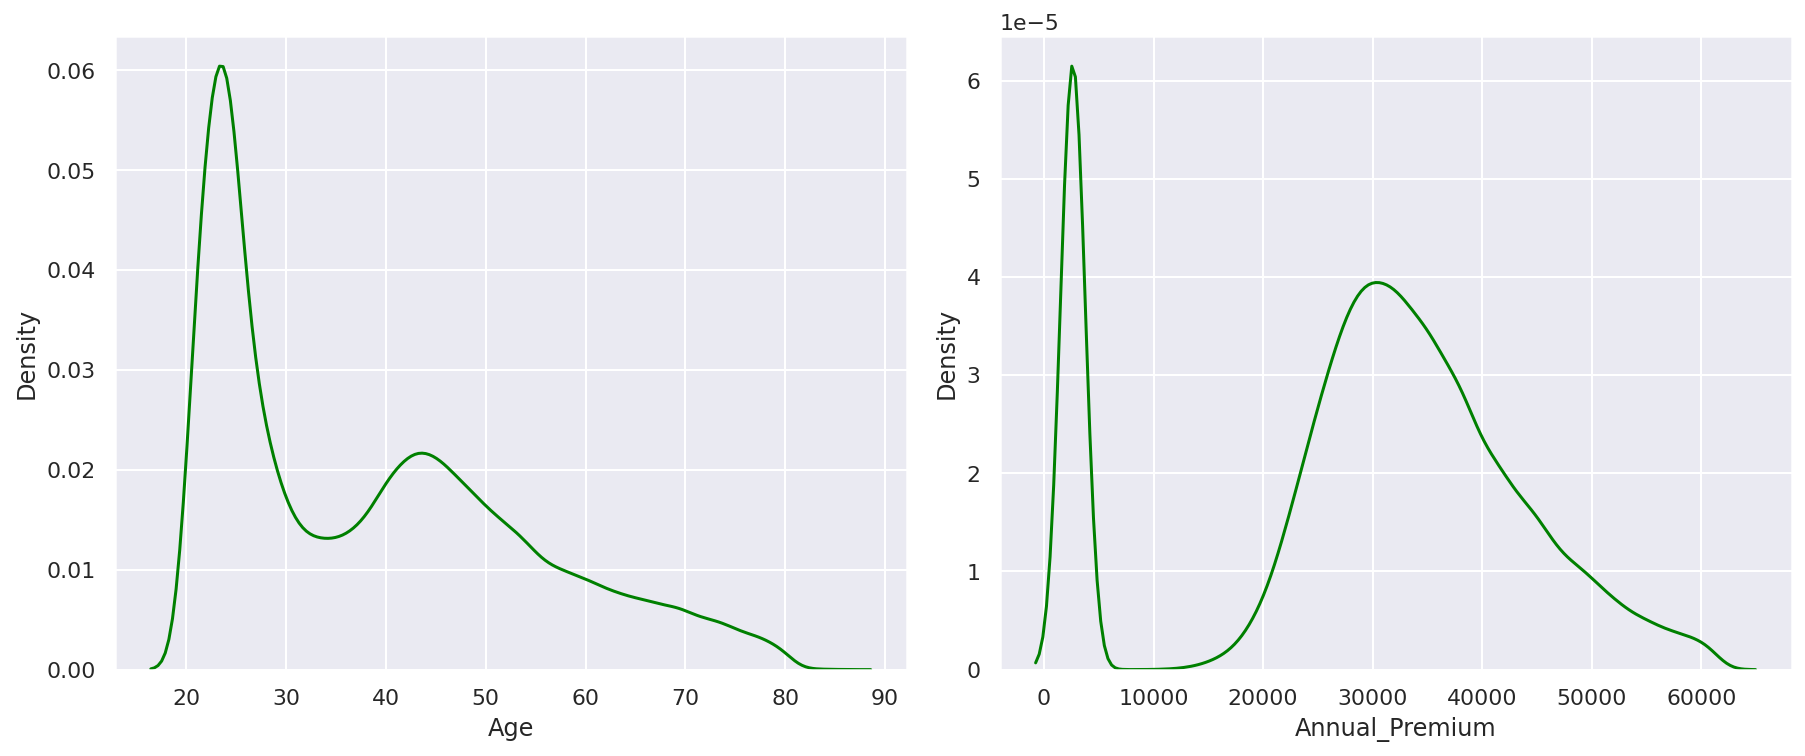

In [219]:
feat = cek_log
plt.figure(figsize=(25, 10))
for i in range(0, len(feat)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[feat[i]], color='green')
    plt.xlabel(feat[i])
    plt.tight_layout()

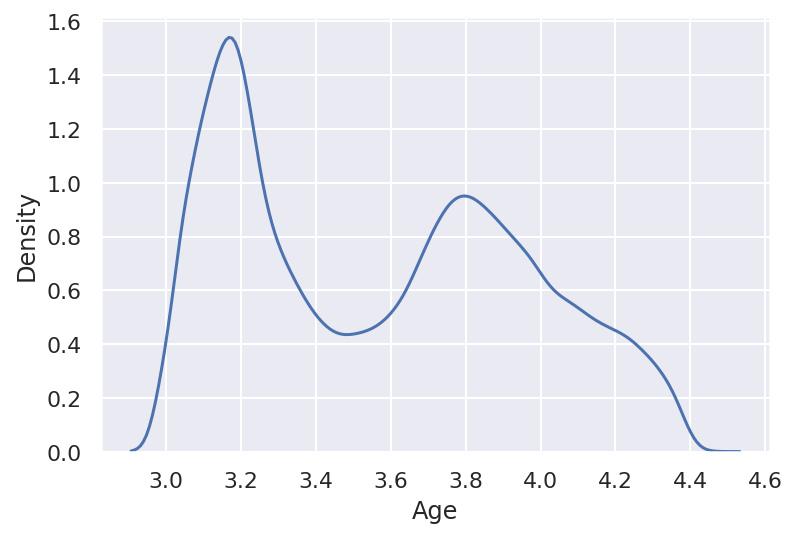

In [220]:
sns.kdeplot(np.log(df['Age']))

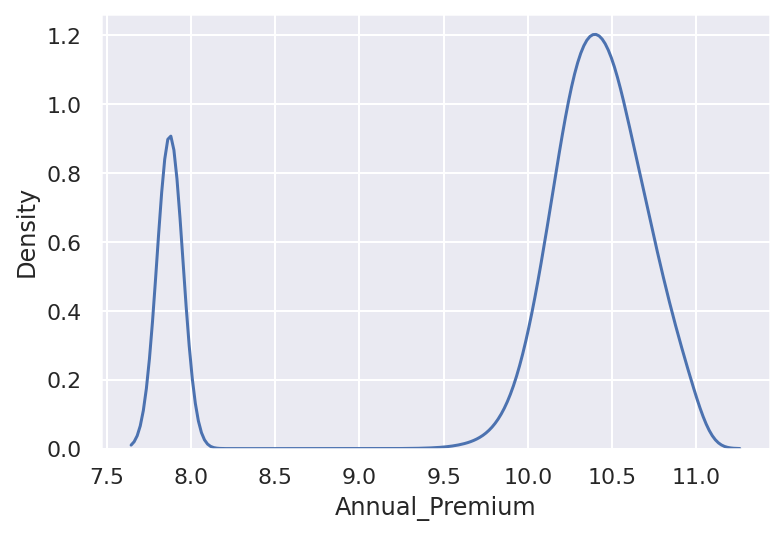

In [221]:
sns.kdeplot(np.log(df['Annual_Premium']))

## E. Feature Encoding

In [222]:
cats_updated = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

for col in cats_updated:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column Gender
Male      200140
Female    170326
Name: Gender, dtype: int64
------------------------------ 

value counts of column Vehicle_Age
1-2 Year     194018
< 1 Year     161445
> 2 Years     15003
Name: Vehicle_Age, dtype: int64
------------------------------ 

value counts of column Vehicle_Damage
Yes    186373
No     184093
Name: Vehicle_Damage, dtype: int64
------------------------------ 



### Gender & Vehicle_Damage



In [223]:
mapping_Gender = {
    'Male' : 0,
    'Female' : 1
}

mapping_vehicle_damage = {
    'No' : 0,
    'Yes' : 1
    
}

mapping_vehicle_Age = {
    '< 1 Year' : 0,
    '1-2 Year' : 1,
    '> 2 Years' : 2
    
}

df['Gender'] = df['Gender'] .map(mapping_Gender)
df['Vehicle_Damage'] = df['Vehicle_Damage'].map(mapping_vehicle_damage)
df['Vehicle_Age'] = df['Vehicle_Age'].map(mapping_vehicle_Age)

In [224]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vintage_std,Vintage_norm
0,1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1,0.748865,0.716263
1,2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0,0.342509,0.598616
2,3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1,-1.521949,0.058824
3,4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0,0.581542,0.667820
4,5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0,-1.378529,0.100346


## F. Class Imbalance

In [225]:
cat_vc = ['Gender', 'Driving_License', 'Policy_Sales_Channel', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']

for col in cat_vc:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column Gender
0    200140
1    170326
Name: Gender, dtype: int64
------------------------------ 

value counts of column Driving_License
1    369704
0       762
Name: Driving_License, dtype: int64
------------------------------ 

value counts of column Policy_Sales_Channel
152.0    132078
26.0      76277
124.0     71845
160.0     21484
156.0     10590
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64
------------------------------ 

value counts of column Region_Code
28.0    99525
8.0     32022
46.0    19624
41.0    17936
15.0    13175
30.0    12176
29.0    10865
50.0    10188
3.0      9171
11.0     9113
36.0     8696
33.0     7608
47.0     7418
35.0     6879
6.0      6273
45.0     5571
37.0     5483
18.0     5114
48.0     4681
14.0     4647
39.0     4551
10.0     4364
21.0     4257
2.0      4038
13.0     4029
12.0     3185
7.0      3165
9.0      3094
27.0     2816
32.0  

In [226]:
pip install imbalanced-learn

In [227]:
!pip install imblearn

In [228]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

### Response

In [229]:
df['Response_class'] = df['Response'] == 0
df['Response_class'].value_counts()

True     325364
False     45102
Name: Response_class, dtype: int64

In [230]:
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['Response', 'Response_class']]]
Y = df['Response_class'].values
print(X.shape)
print(Y.shape)

(370466, 13)
(370466,)


In [231]:
x_under, y_under = under_sampling.RandomUnderSampler(1).fit_resample(X, Y)
x_over, y_over = over_sampling.RandomOverSampler(1).fit_resample(X, Y)
x_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(1).fit_resample(X, Y)

In [232]:
print('Normal')
print(pd.Series(Y).value_counts())
print('\n')
print('Under Sampling')
print(pd.Series(y_under).value_counts())
print('\n')
print('Over Sampling')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Normal
True     325364
False     45102
dtype: int64


Under Sampling
False    45102
True     45102
dtype: int64


Over Sampling
False    325364
True     325364
dtype: int64


SMOTE
False    325364
True     325364
dtype: int64


### Grafik Perbandingan Sebelum dan Sesudah

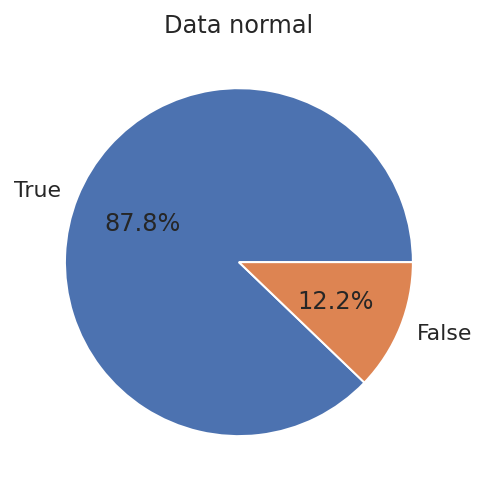

In [233]:
pd.Series(Y).value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Data normal")
plt.ylabel("")
plt.show()

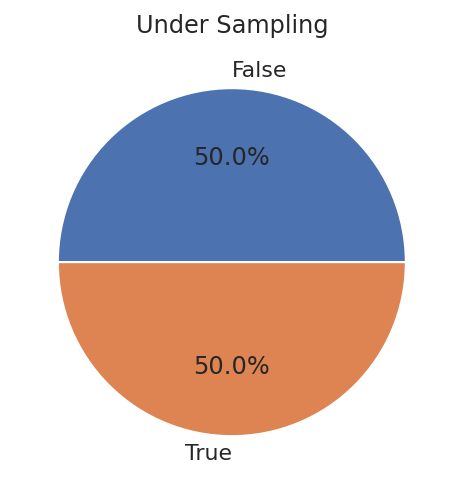

In [234]:
pd.Series(y_under).value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Under Sampling")
plt.ylabel("")
plt.show()

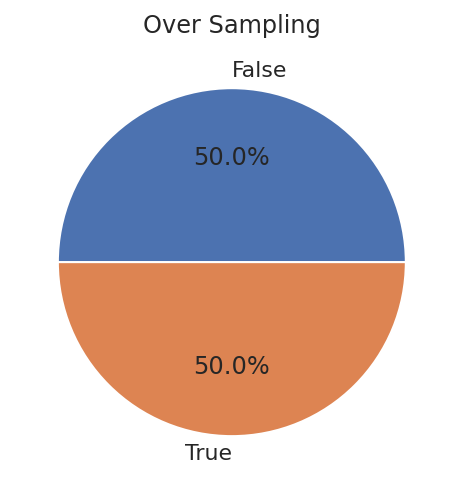

In [235]:
pd.Series(y_over).value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Over Sampling")
plt.ylabel("")
plt.show()

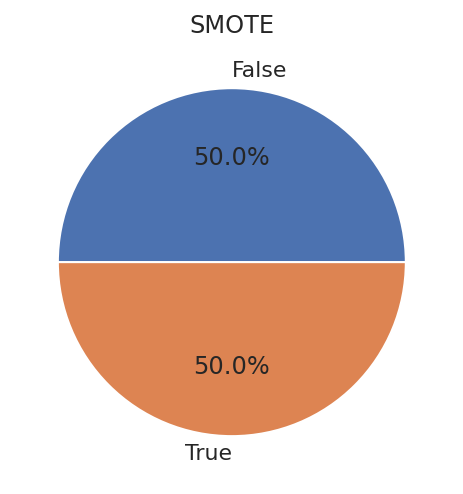

In [236]:
pd.Series(y_over_SMOTE).value_counts().plot.pie(autopct='%1.1f%%')
plt.title("SMOTE")
plt.ylabel("")
plt.show()

# **2. Feature Engineering**

In [237]:
#Feature selection refer to EDA in the 1st stage & refer to business knowledge

df2 = df[['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel','Response']]
df2['Annual_Premium'] = df2['Annual_Premium'].astype(int)
df2.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,0,44,1,28.0,0,2,1,40454,26.0,1
1,0,76,1,3.0,0,1,0,33536,26.0,0
2,0,47,1,28.0,0,2,1,38294,26.0,1
3,0,21,1,11.0,1,0,0,28619,152.0,0
4,1,29,1,41.0,1,0,0,27496,152.0,0


Berdasarkan hasil analisa pada proses EDA (Exploratory Data Analysis) serta referensi yang didapatkan dari data external (OJK). Maka feature yang digunakan yaitu sebagai berikut:

1.   Gender
      Berdasarkan hasil EDA menunjukkan bahwa lebih dari 300.000 pengguna yang terdiri dari laki-laki dan perempuan tidak tertarik untuk menggunakan produk asuransi kendaraan, hanya sekitar 10% dari total keseluruhan pengguna yang memiliki 
ketertarikan untuk menggunakan produk asuransi kendaraan. Sehingga, dapat ditarik kesimpulan bahwa tidak ada pengaruh yang signifikan jika produk asuransi ditawarkan berdasarkan gender dari pengguna .

2.   Age
     Berdasarkan hasil EDA menunjukkan bahwa rentang usia 40 tahun sampai 50 tahun memiliki ketertarikan yang lebih tinggi untuk menggunakan jasa asuransi kendaraan sedangkan customer pada rentang usia 20 tahun sampai 30 tahun cenderung tidak tertarik menggunakan jasa asuransi kendaraan.  Dari data tersebut dapat diambil kesimpulan untuk lebih memfokuskan promosi asuransi kendaraan kepada customer dengan rentang usia 40 tahun sampai 50 tahun.

3.   Driving Lisence
      Berdasarkan hasil EDA dapat dilihat bahwa banyak konsumen yang memiliki Driving License namun belum tertarik untuk mengambil Asuransi Kendaraan. Konsumen yang sudah memiliki Driving License dapat didorong dengan memberikan informasi keuntungan memiliki Asuransi Kendaraan atau promosi asuransi.

4.   Previously Insured
      Secara bisnis kita dapat menggali informasi lebih dalam melalui customer yang pernah mengasuransikan kendaraannya namun tidak tertarik ketika ditawarkan kembali, kita dapat menggali faktor apa saja yang  menyebabkan customer tidak tertarik lagi. apakah dari proses claimmnya yang tidak memuaskan? atau cakupan manfaatnya kurang sesuai?. kemudian dari informasi tersebut dapat kita gunakan untuk mengembangkan produk kita agar lebih sesuai dengan kebutuhan customer.

5.  Vehicle Age
     Berdasarkan hasil EDA menunjukkan perbandingan data customer yang seimbang berada pada Vehicle Age yang nomor 2, bisa diperkirakan 50:50. Pihak asuransi dapat menambah jumlah kendaraan yang baru untuk meningkatkan ketertarikan masyarakat untuk berlangganan asuransi kendaraan. Dengan menggunakan kendaraan yang baru dapat menurunkan tingkat kerusakan kendaraan dan masyarakat juga merasa aman dalam menggunakan kendaraan tersebut. 

6.   Vehicle Damage
      Berdasarkan grafik dapat diketahui bahwa total user yang kendaraannya sudah pernah mengalami kerusakan, memberi respon tertarik (1) lebih banyak dibandingkan dengan user yang kendaraannya tidak terdapat kerusakan. Jika dibandingkan, total user dengan respon tidak tertarik (0) dengan kendaraan yang tidak mengalami kerusakan lebih banyak dibandingkan 
dengan yang mengalami kerusakan

7.   Annual Premium 
      Annual Premium tidak berpengaruh terhadap Response konsumen 
karena jumlah Response Yes dan No terhadap Annual Premium berimbang. Maka dapat disimpulkan bahwa Annual Premium tidak dapat dijadikan sebagai faktor untuk menarik konsumen mengambil asuransi kendaraan. Namun feature ini diperlukan untuk mencari tahu besaran premi yang dibayarkan oleh tiap customer sehinggga feature ini bisa dijadikan suatu metode / data pendukung dalam approaching potential customer.


Adapun, feature yang di drop dari dataframe diatas yaitu:

1.   Id
     Berdasarkan hasil EDA, Id customer hanya mmerupakan nomor urut untuk  identitas customer sehingga tidak ditemukan korelasi / pengaruh terhadap response

2.   Vintage
      Berdasarkan hasil EDA, feature vintage tidak memiliki korelasi / pengaruh terhadap response customer terhadap layanan vehicle insurance ini. Sehingga feature ini tidak dapat dijadikan sebagaii dasar / data pendukung untuk approaching customer.

3.   Driving Lisence
      Berdasarkan hasil EDA, Driving lisence tidak mempengaruhi response customer mengenai ketertarikannya untuk menggunakan jasa layanan asuransi kendaraan bermotor.



**Penambahan Feature Baru**

Berdasarkan referensi dari data external (OJK), didapatkan 2 tambahan feature / variable yang sering kali digunakan oleh perusahaan asuransi kendaraan bermotor untuk melakukan pendekatan / mapping potential customer. Feature yang dimaksud yaitu pengklasifikasian customer berdasarkan annual premi dan klasifikasi premi berdasarkan umur kendaraan bermotor (vehicle age).

Menambahkan feature segment (klasifikasi customer berdasarkan annual premium). Penambahan feature ini bertujuan untuk mempermudah proses analisa tipe - tipe customer berdasarkan annual premi yang dibayarkan. Annual premei tersebut bermanfaat bagi tim bisnis / sales dalam menentukan program / strategi apa yang cocok untuk approaching masing masing tipe customer tersebut.

In [238]:
df3 = df2.groupby(['Region_Code'])['Annual_Premium'].describe(percentiles = [.25, .5, .75, .9, .95]).reset_index()
df3.head()

,Region_Code,count,mean,std,min,25%,50%,75%,90%,95%,max
0,0.0,2019.0,2973.790986,3618.653254,2630.0,2630.0,2630.0,2630.0,2630.0,2630.00,59079.0
1,1.0,1008.0,2711.285714,1498.189994,2630.0,2630.0,2630.0,2630.0,2630.0,2630.00,33770.0
2,2.0,4038.0,26955.212729,11135.774534,2630.0,23839.5,29602.0,33833.5,37623.5,40459.25,61265.0
3,3.0,9171.0,24054.076000,13132.134579,2630.0,19416.0,26034.0,32464.0,38524.0,42864.00,61544.0
4,4.0,1796.0,23476.290089,13782.455655,2630.0,2630.0,27148.5,32271.0,38215.0,42666.25,60834.0


In [239]:
df4 = df2.merge(df3[['Region_Code', '25%', '50%', '75%']], on='Region_Code', how='inner')
df4.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,25%,50%,75%
0,0,44,1,28.0,0,2,1,40454,26.0,1,30197.0,37784.0,45202.0
1,0,47,1,28.0,0,2,1,38294,26.0,1,30197.0,37784.0,45202.0
2,1,56,1,28.0,0,1,1,32031,26.0,1,30197.0,37784.0,45202.0
3,0,76,1,28.0,0,1,1,36770,13.0,0,30197.0,37784.0,45202.0
4,0,71,1,28.0,1,1,0,46818,30.0,0,30197.0,37784.0,45202.0


In [240]:
def segment(x):
    if x['Annual_Premium'] < x['25%']:
        segment = 'Small Cust'
    elif x['Annual_Premium'] <= x['75%'] and x['Annual_Premium'] >= x['50%']:
        segment = 'Mid Cust'
    else:
        segment = 'Big Cust'
    return segment

In [241]:
df4['segment'] = df4.apply(lambda x: segment(x), axis=1)
df4.tail()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,25%,50%,75%,segment
370461,1,24,1,52.0,0,0,1,2630,160.0,0,7517.75,34812.5,39384.75,Small Cust
370462,1,36,1,52.0,0,1,1,2630,156.0,0,7517.75,34812.5,39384.75,Small Cust
370463,1,52,1,52.0,0,1,0,38666,124.0,0,7517.75,34812.5,39384.75,Mid Cust
370464,0,65,1,52.0,0,2,1,37150,163.0,1,7517.75,34812.5,39384.75,Mid Cust
370465,1,23,1,52.0,1,0,0,45008,152.0,0,7517.75,34812.5,39384.75,Big Cust


Menambahkan feature Premi rate (klasifikasi premi berdasarkan umur kendaraan bermotor nya (vehicle age)). Penambahan feature ini bertujuan untuk mempermudah tim bisnis dalam memberikan gambaran premi yang sesuai dengan umur kendaraan (vehicle age) sehingga proses underwritting dapat lebih efisien.

In [242]:
def premi_rate(y):
    if y['Vehicle_Age'] < 2:
        premi_rate = 'All Risk'
    else:
        premi_rate = 'TLO'
    return premi_rate

In [243]:
df4['premi_rate'] = df4.apply(lambda y: premi_rate(y), axis=1)
df4.tail()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,25%,50%,75%,segment,premi_rate
370461,1,24,1,52.0,0,0,1,2630,160.0,0,7517.75,34812.5,39384.75,Small Cust,All Risk
370462,1,36,1,52.0,0,1,1,2630,156.0,0,7517.75,34812.5,39384.75,Small Cust,All Risk
370463,1,52,1,52.0,0,1,0,38666,124.0,0,7517.75,34812.5,39384.75,Mid Cust,All Risk
370464,0,65,1,52.0,0,2,1,37150,163.0,1,7517.75,34812.5,39384.75,Mid Cust,TLO
370465,1,23,1,52.0,1,0,0,45008,152.0,0,7517.75,34812.5,39384.75,Big Cust,All Risk


**Fitur baru untuk point C**
- region_code_desc - untuk point C
- sales_channel_desc - untuk point C
- klasifikasi kendaraan (mobil (truck pribadi & komersil (premi nya sama), non truck pribadi, non truck komersil, motor) - untuk point C
- premi_benefit/coverage (comprehensive, TLO) - jenis pertanggungan

In [244]:
#Classify the data in the new features into number

df4.loc[df4['segment'] == 'Big Cust', 'segment'] = 2
df4.loc[df4['segment'] == 'Mid Cust', 'segment'] = 1 
df4.loc[df4['segment'] == 'Small Cust', 'segment'] = 0
 
df4.loc[df4['premi_rate'] == 'All Risk', 'premi_rate'] = 1 
df4.loc[df4['premi_rate'] == 'TLO', 'premi_rate'] = 0 


In [245]:
for col in df4.columns:
    df4[col] = df4[col].astype(np.int32)

In [246]:
df4.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,25%,50%,75%,segment,premi_rate
0,0,44,1,28,0,2,1,40454,26,1,30197,37784,45202,1,0
1,0,47,1,28,0,2,1,38294,26,1,30197,37784,45202,1,0
2,1,56,1,28,0,1,1,32031,26,1,30197,37784,45202,2,1
3,0,76,1,28,0,1,1,36770,13,0,30197,37784,45202,2,1
4,0,71,1,28,1,1,0,46818,30,0,30197,37784,45202,2,1


In [247]:
smote = SMOTE(random_state=1,n_jobs=-1)

In [248]:
x_sample,y_sample = smote.fit_resample(df4.iloc[:],df4['Response'])

In [249]:
x_frame = pd.DataFrame(x_sample,columns=['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
                                         'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel',
                                         'segment','premi_rate'])

In [250]:
x_frame.tail()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,segment,premi_rate
650723,0,33,1,28,0,1,1,23446,122,0,1
650724,0,67,1,12,0,0,1,17616,34,0,1
650725,0,24,1,15,0,0,1,48295,147,2,1
650726,0,64,1,28,0,1,1,49380,26,2,0
650727,1,50,1,28,0,1,1,25987,26,0,1


In [251]:
y_frame = pd.DataFrame(y_sample,columns=['Response'])

In [252]:
y_frame.head()

,Response
0,1
1,1
2,1
3,0
4,0


In [253]:
y=y_frame.copy()

In [254]:
x=x_frame.copy()

[0.04285918 0.12604719 0.00041516 0.06876858 0.21946698 0.03346639
 0.14232807 0.23920843 0.10426464 0.00564494 0.01753044]


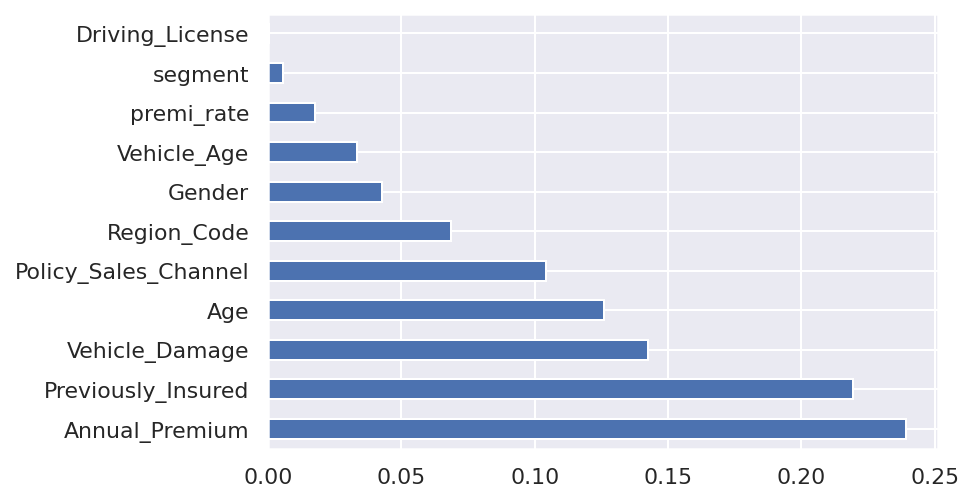

In [255]:
model = ExtraTreesClassifier()
model = model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas

#plot_graph_of_feature_importances for better_visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [256]:
#x=x_frame.drop(['Driving_License'],axis=1,inplace=True)
#x=x_frame.copy()

In [257]:
x.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,segment,premi_rate
0,0,44,1,28,0,2,1,40454,26,1,0
1,0,47,1,28,0,2,1,38294,26,1,0
2,1,56,1,28,0,1,1,32031,26,2,1
3,0,76,1,28,0,1,1,36770,13,2,1
4,0,71,1,28,1,1,0,46818,30,2,1


## Split Test & Train

In [258]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(455509, 11) (195219, 11) (455509, 1) (195219, 1)


# Modeling

## Logistic Regression

In [259]:
logreg=LogisticRegression()
logreg=logreg.fit(x_train,y_train)
pred=logreg.predict(x_test)
lr_probability =logreg.predict_proba(x_test)[:,1]

acc_lr=accuracy_score(y_test,pred)
recall_lr=recall_score(y_test,pred)
precision_lr=precision_score(y_test,pred)
f1score_lr=f1_score(y_test,pred)
AUC_LR=roc_auc_score(pred,y_test)

#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.7866652323800449
ROC_AUC Score: 0.7988615013214511


In [260]:
#print('Train score: ' + str(logreg.score(x_train, y_train)))
#print('Test score: ' + str(logreg.score(x_test, y_test)))

trlr = (str(logreg.score(x_train, y_train)))
tslr = (str(logreg.score(x_test, y_test)))

print('Train score: ' + trlr)
print('Test score: ' + tslr)

Train score: 0.7868648039885051
Test score: 0.7866652323800449


In [261]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.69      0.86      0.76     77780
           1       0.89      0.74      0.81    117439

    accuracy                           0.79    195219
   macro avg       0.79      0.80      0.78    195219
weighted avg       0.81      0.79      0.79    195219



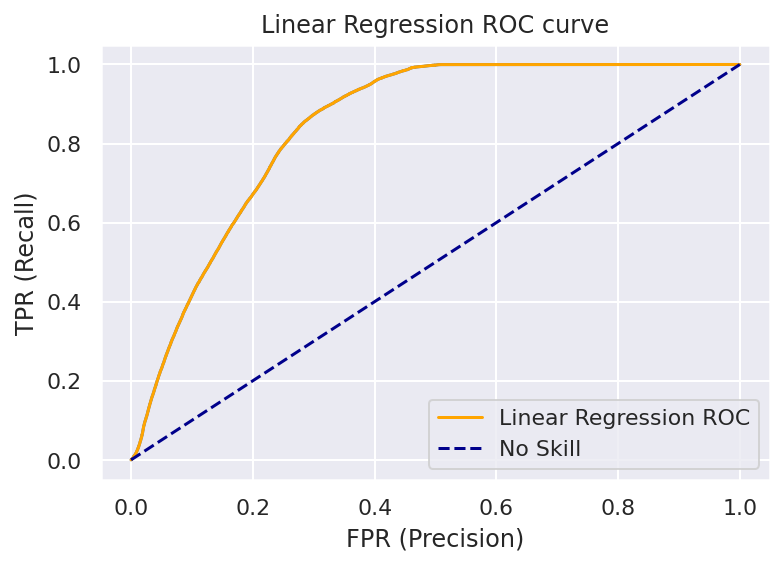

In [262]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, lr_probability)

plt.plot(fpr,tpr)
plt.plot(fpr, tpr, color='orange', label='Linear Regression ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='No Skill')
#plt.plot((0,1), ls='dashed',color='black')

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.legend()
plt.show()

## XGBoost

In [263]:
xgbc = XGBClassifier(n_jobs = -1,n_estimators=150,learning_rate=0.01)
clf_x = xgbc.fit(x_train,y_train)
y_pred_x = clf_x.predict(x_test)

acc_xg=accuracy_score(y_test,y_pred_x)
recall_xg=recall_score(y_test,y_pred_x)
precision_xg=precision_score(y_test,y_pred_x)
f1score_xg=f1_score(y_test,y_pred_x)
AUC_XG=roc_auc_score(y_test,y_pred_x)

#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred_x))
print("ROC_AUC Score:",AUC_XG)

Accuracy :  0.8096035734226689
ROC_AUC Score: 0.8094130656367249


In [264]:
#print('Train score: ' + str(xgbc.score(x_train, y_train)))
#print('Test score: ' + str(xgbc.score(x_test, y_test)))

trxg = (str(xgbc.score(x_train, y_train)))
tsxg = (str(xgbc.score(x_test, y_test)))

print('Train score: ' + trxg)
print('Test score: ' + tsxg)

Train score: 0.810102544625902
Test score: 0.8096035734226689


In [265]:
print(classification_report(y_test,y_pred_x))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78     97477
           1       0.74      0.95      0.83     97742

    accuracy                           0.81    195219
   macro avg       0.84      0.81      0.81    195219
weighted avg       0.84      0.81      0.81    195219



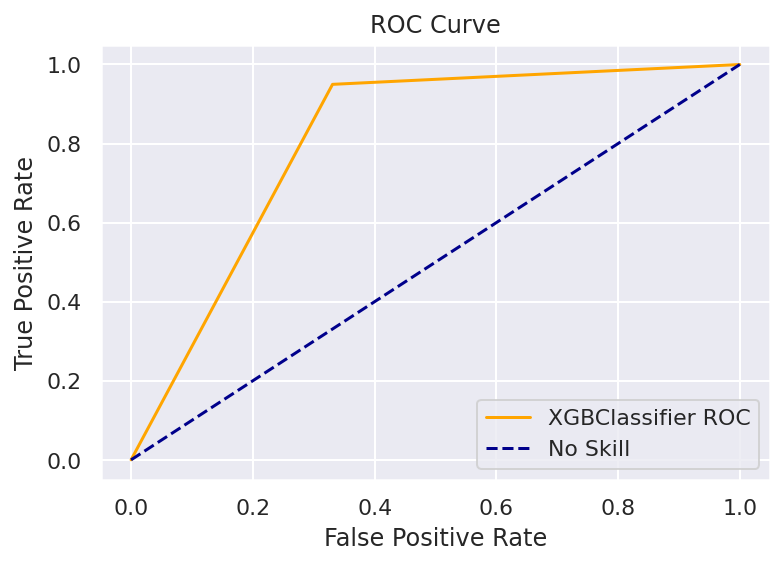

In [266]:
fpr1,tpr1,threshold=roc_curve(y_test,y_pred_x)
plt.plot(fpr1, tpr1, color='orange', label='XGBClassifier ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Random Forest

In [267]:
scaler = StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

In [268]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
RF_probability = randomforest.predict_proba(x_test)[:,1]

AUC_RF=roc_auc_score(y_pred,y_test)
acc_rf=accuracy_score(y_test,y_pred)
recall_rf=recall_score(y_test,y_pred)
precision_rf=precision_score(y_test,y_pred)
f1score_rf=f1_score(y_test,y_pred)

print(accuracy_score(y_pred,y_test))
print("ROC_AUC Score:",AUC_RF)

0.8579492774781143
ROC_AUC Score: 0.8590879154356799


In [269]:
#print('Train score: ' + str(randomforest.score(x_train, y_train)))
#print('Test score: ' + str(randomforest.score(x_test, y_test)))

trfc = (str(randomforest.score(x_train, y_train)))
tsfc = (str(randomforest.score(x_test, y_test)))

print('Train score: ' + trfc)
print('Test score: ' + tsfc)

Train score: 0.9828521500124037
Test score: 0.8579492774781143


In [270]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85     97477
           1       0.84      0.89      0.86     97742

    accuracy                           0.86    195219
   macro avg       0.86      0.86      0.86    195219
weighted avg       0.86      0.86      0.86    195219



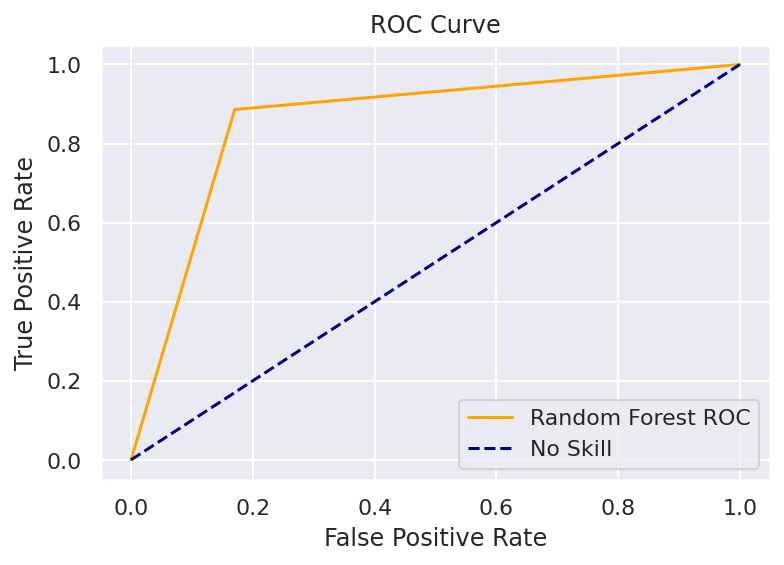

In [271]:
fpr2,tpr2,threshold=roc_curve(y_test,y_pred)
plt.plot(fpr2, tpr2, color='orange', label='Random Forest ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Decision Tree

In [272]:
#Fit & Predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def eval_classification(model, x_train, y_train, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
#     print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator.get_params())

In [273]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
eval_classification(dt, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.84
Recall (Test Set): 0.87
F1-Score (Test Set): 0.86
AUC (test-proba): 0.86
AUC (train-proba): 1.00


In [274]:
acc_dt=accuracy_score(y_test, y_pred)
recall_dt=recall_score(y_test, y_pred)
precision_dt=precision_score(y_test, y_pred)
f1score_dt=f1_score(y_test, y_pred)
AUC_DT=roc_auc_score(y_test,y_pred)

In [275]:
trdt = (str(dt.score(x_train, y_train)))
tsdt = (str(dt.score(x_test, y_test)))

print('Train score: ' + trdt)
print('Test score: ' + tsdt)

Train score: 0.9828719081291478
Test score: 0.8526526618822963


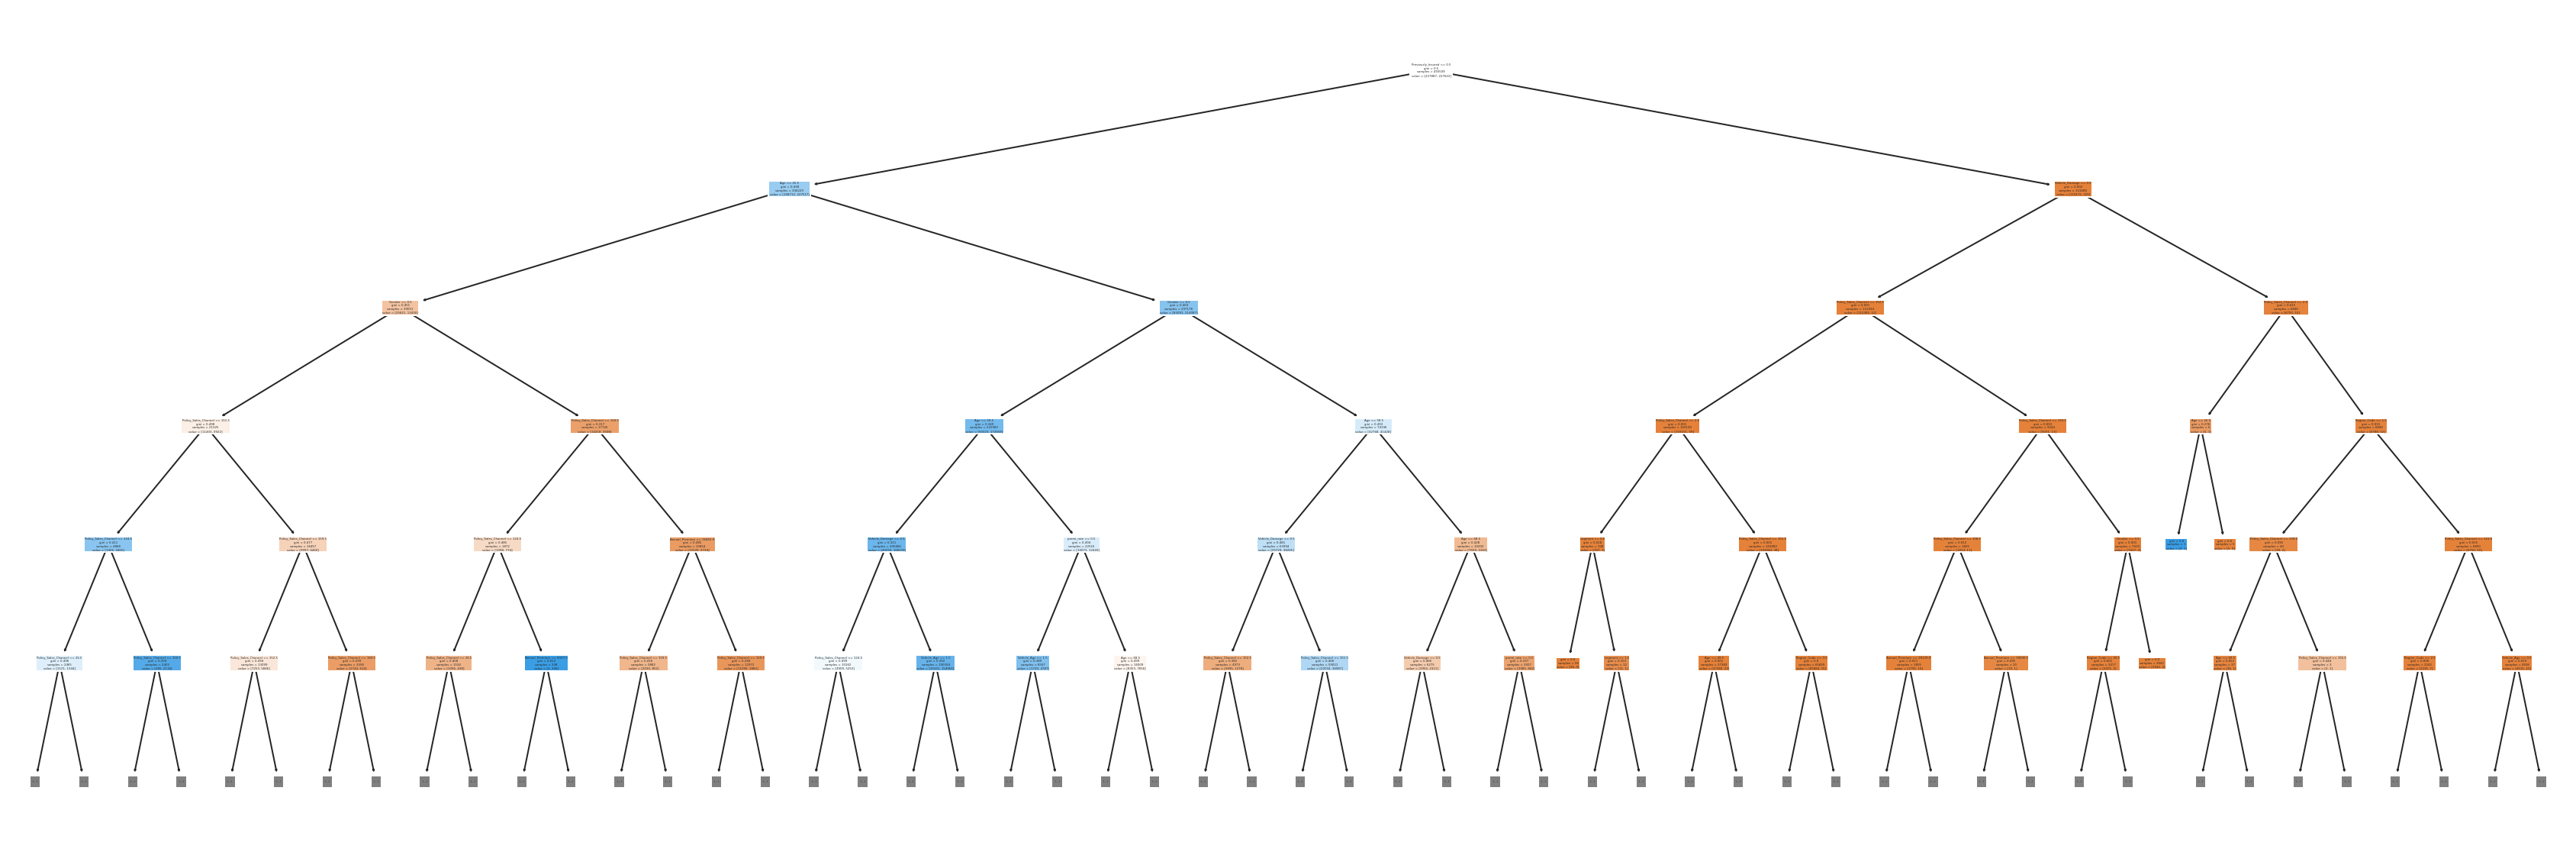

In [282]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(30,10))

plot_tree(dt, feature_names=x_train.columns, max_depth=5, filled=True);

## Model Evaluation Comparation

In [277]:
ind=['Logistic regression','Randomforest','XGBClassifier', 'DecisionTreeClassifier']
data={"Accuracy":[acc_lr,acc_rf,acc_xg,acc_dt],"Recall":[recall_lr,recall_rf,recall_xg,recall_dt],"Precision":[precision_lr,precision_rf,precision_xg,precision_dt],
    'f1_score':[f1score_lr,f1score_rf,f1score_xg,f1score_dt],"ROC_AUC":[AUC_LR,AUC_RF,AUC_XG,AUC_DT]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.786665,0.887715,0.738826,0.806456,0.798862
Randomforest,0.857949,0.886057,0.839204,0.861994,0.859088
XGBClassifier,0.809604,0.949755,0.742120,0.833196,0.809413
DecisionTreeClassifier,0.852653,0.873719,0.838717,0.855860,0.852624


In [278]:
ind=['Train','Test']
d = {'Logistic regression': [trlr,tslr], 'Randomforest': [trfc,tsfc], 'XGBClassifier': [trxg,tsxg], 'Decision Tree': [trdt,tsdt]}

modelcompare= pd.DataFrame(data=d, index=ind)
modelcompare

,Logistic regression,Randomforest,XGBClassifier,Decision Tree
Train,0.7868648039885051,0.9828521500124037,0.810102544625902,0.9828719081291478
Test,0.7866652323800449,0.8579492774781143,0.8096035734226689,0.8526526618822963


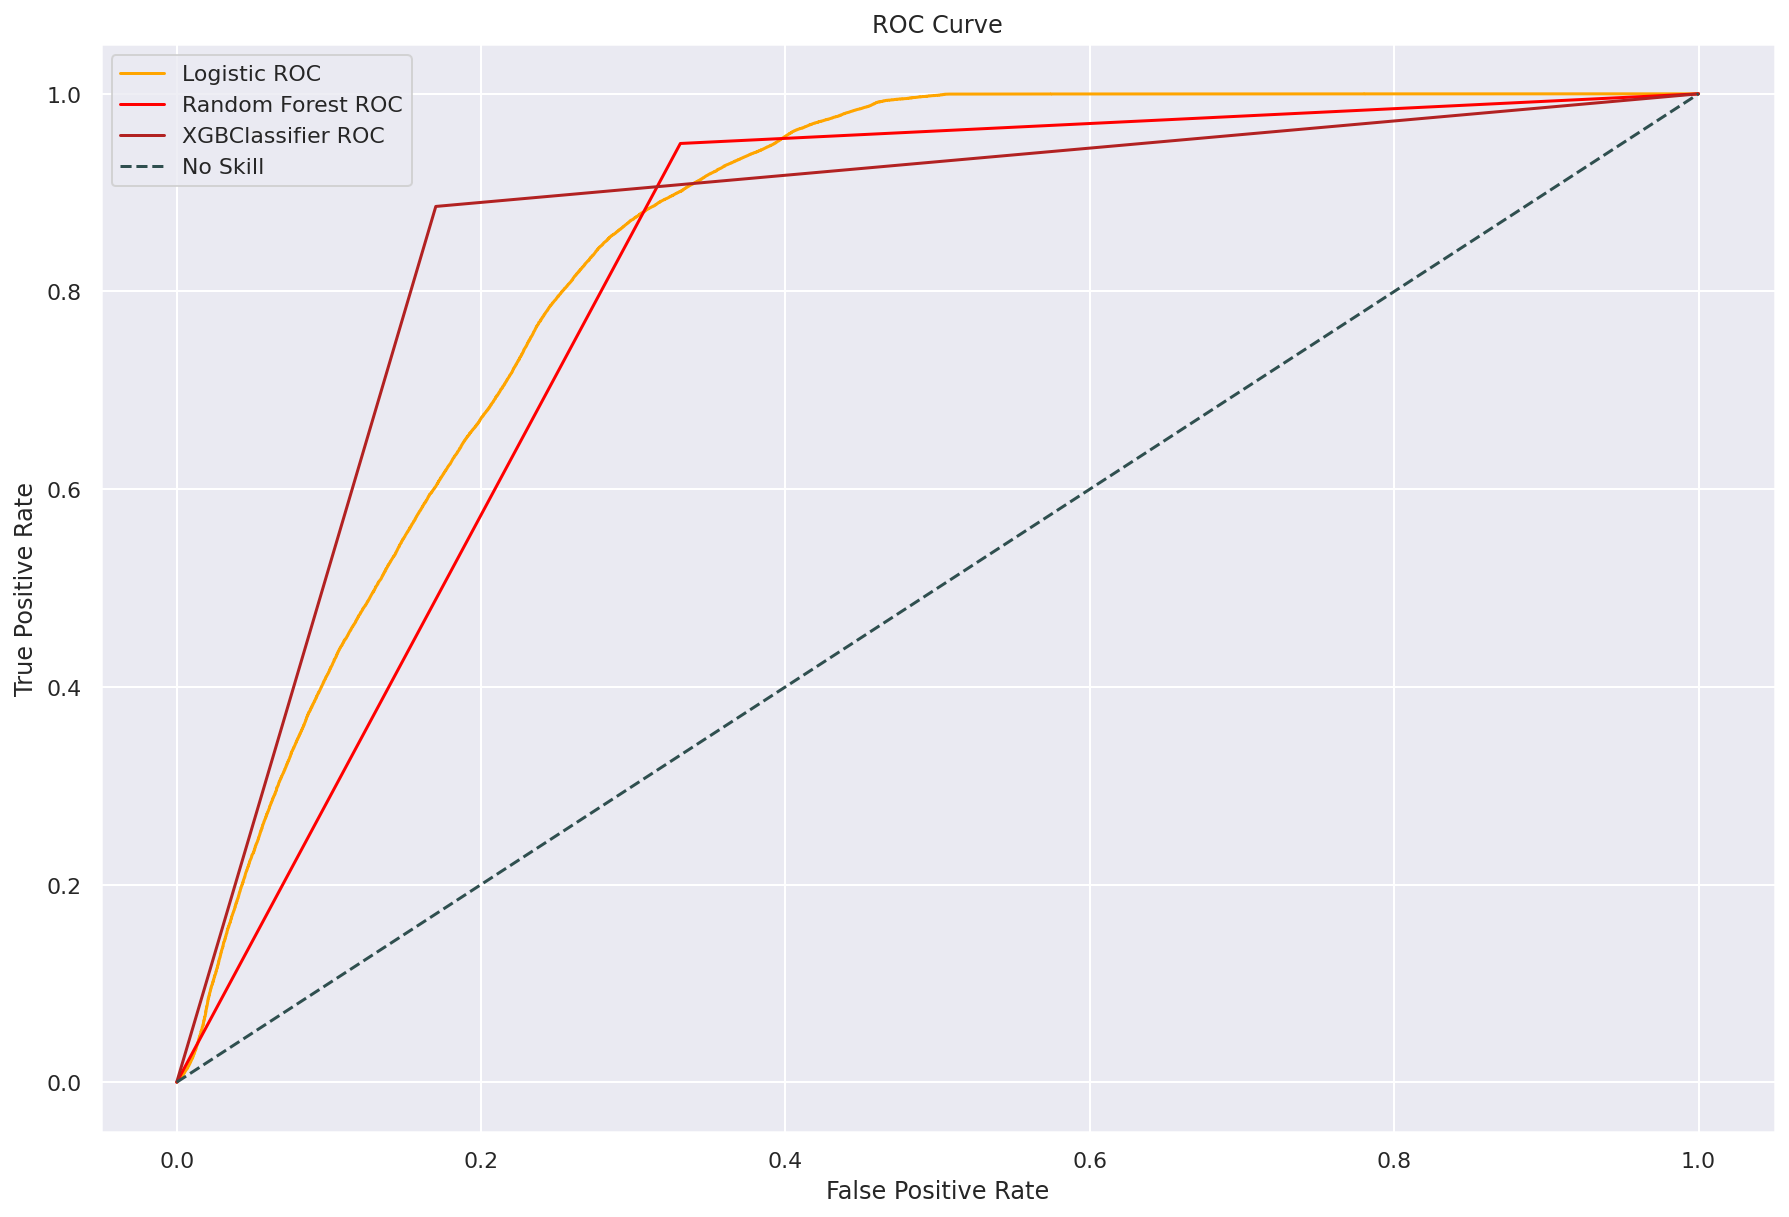

In [285]:
#Plot to show all the Roc Curve with Different Models
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, color='orange', label='Logistic ROC')
plt.plot(fpr1, tpr1, color='red', label='Random Forest ROC')
plt.plot(fpr2, tpr2, color='firebrick', label='XGBClassifier ROC')
#plt.plot(fpr3, tpr3, color='indigo', label='DecisionTreeClassifier ROC')

plt.plot([0, 1], [0, 1], color='darkslategrey', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Hyperparameter Tuning

### Random Forest

In [288]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import numpy as np

n_estimators = [int(x) for x in np.linspace(1, 100, num=100)]
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [int(x) for x in np.linspace(1, 40, num=40)]
min_samples_leaf = [int(x) for x in np.linspace(1, 20, num=20)]
max_features = ['auto', 'sqrt']
criterion = ['gini', 'entropy']

hyperparams = dict(n_estimators=n_estimators,
                  max_depth=max_depth,
                  min_samples_split=min_samples_split,
                  min_samples_leaf=min_samples_leaf,
                  max_features=max_features,
                  criterion=criterion)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparams, cv=5, scoring='roc_auc')
rs.fit(x_train, y_train)
eval_classification(rs, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.82
Recall (Test Set): 0.91
F1-Score (Test Set): 0.86
AUC (test-proba): 0.94
AUC (train-proba): 0.97


In [286]:
#print('Train score: ' + str(randomforest.score(x_train, y_train)))
#print('Test score: ' + str(randomforest.score(x_test, y_test)))

trfc = (str(rs.score(x_train, y_train)))
tsfc = (str(rs.score(x_test, y_test)))

print('Train score: ' + trfc)
print('Test score: ' + tsfc)

Train score: 0.962094332504962
Test score: 0.9361372522667636


### Decision Tree

In [287]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model.fit(x_train, y_train)

# Predict & Evaluation
y_pred = model.predict(x_test)#Check performa dari model
eval_classification(model, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.83
Recall (Test Set): 0.85
F1-Score (Test Set): 0.84
AUC (test-proba): 0.90
AUC (train-proba): 0.98


In [289]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 1
Best max_features: sqrt


In [290]:
print('Train score: ' + str(model.score(x_train, y_train))) #accuracy
print('Test score:' + str(model.score(x_test, y_test))) #accuracy

Train score: 0.9188898883076735
Test score:0.8346854246238499


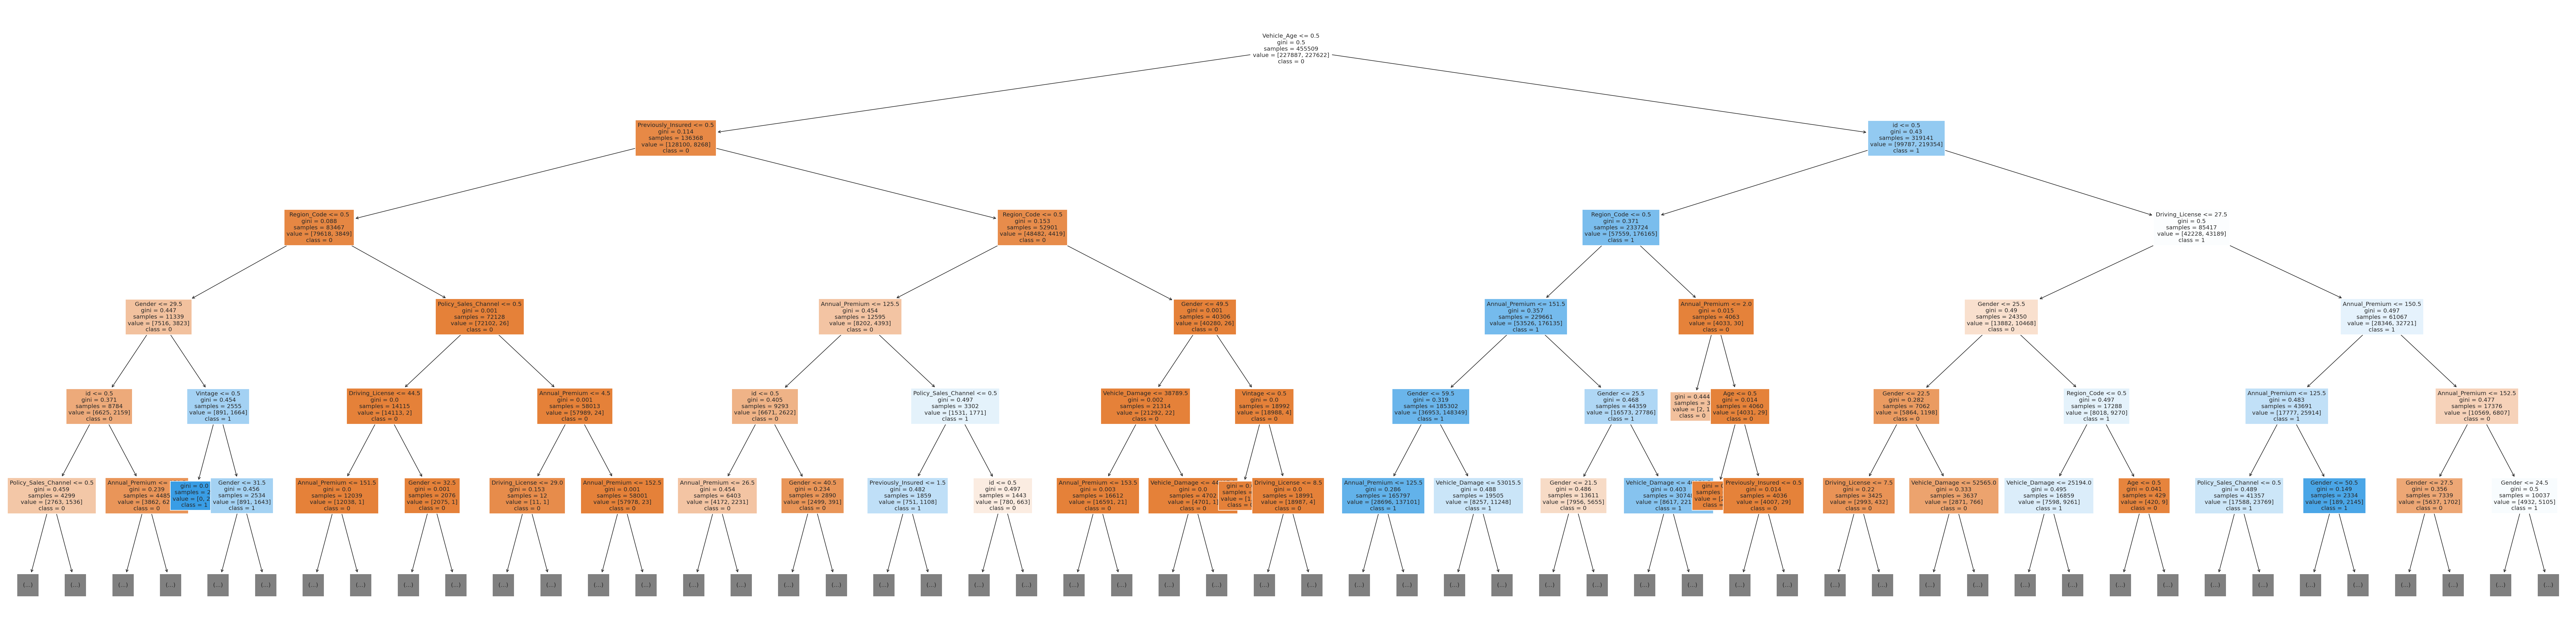

In [301]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(80, 20))
tree.plot_tree(model.best_estimator_,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

## Feature Importance

### Random Forest

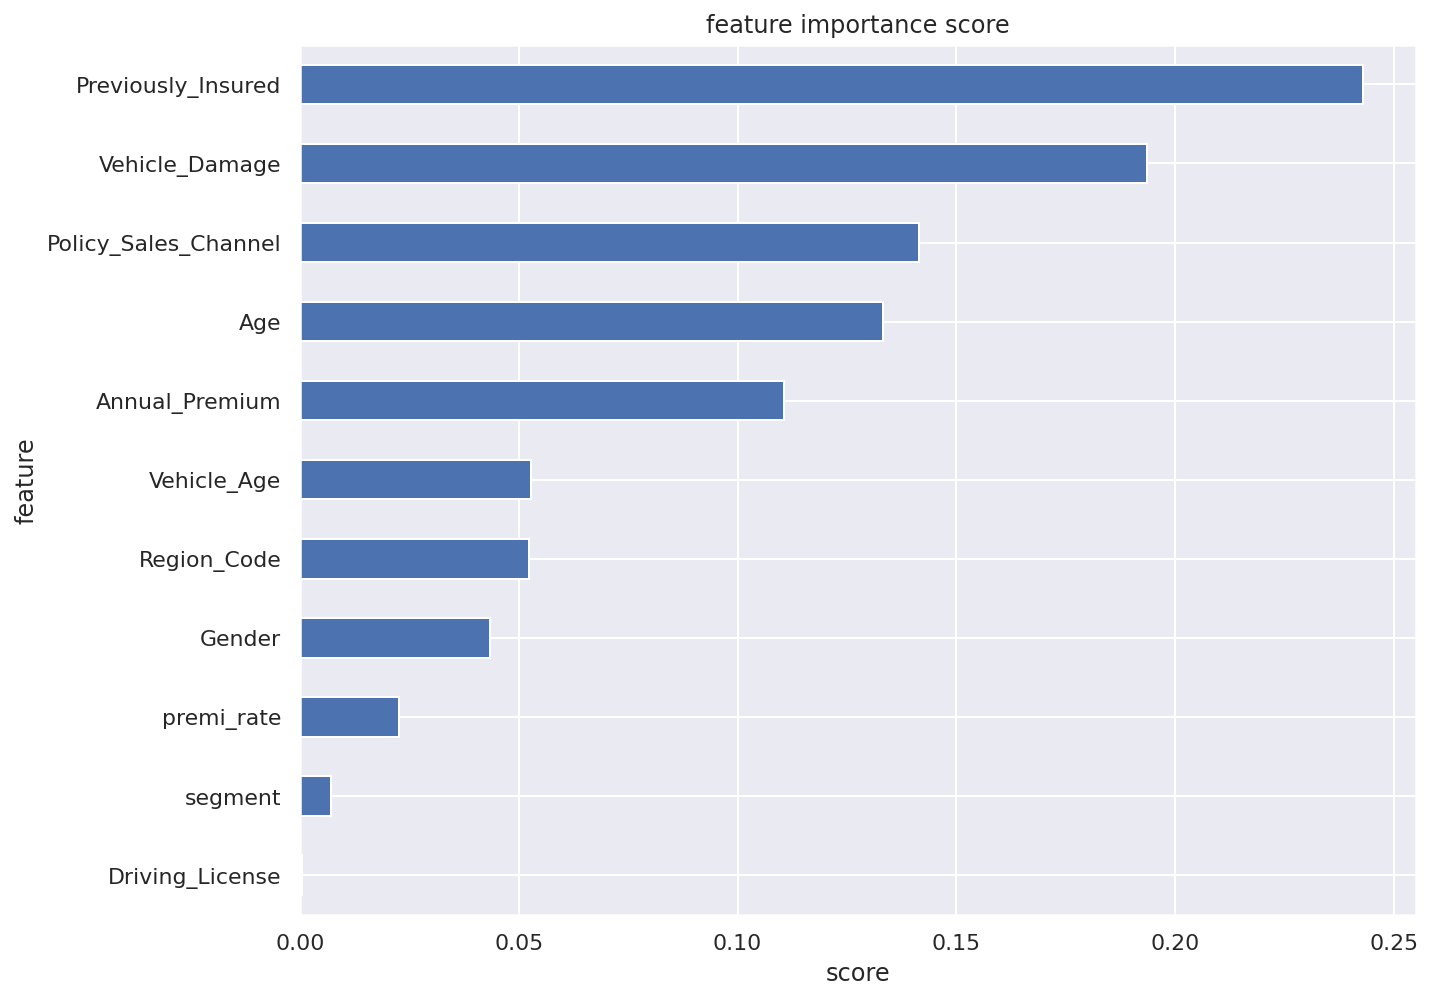

In [302]:
show_feature_importance(rs.best_estimator_)

### INSIGHT

Dari hasil feature importance pada model Random Forest didapatkan top 5 feature yaitu:


1.   Previously Insured
2.   Vehicle Damage   
3.   Policy Sales Channel
4.   Age
5.   Annual Premium

Diluar top 5 feature terdapat feature yang penting secara teori untuk model yaitu feature Vehicle Age

### Decision Tree

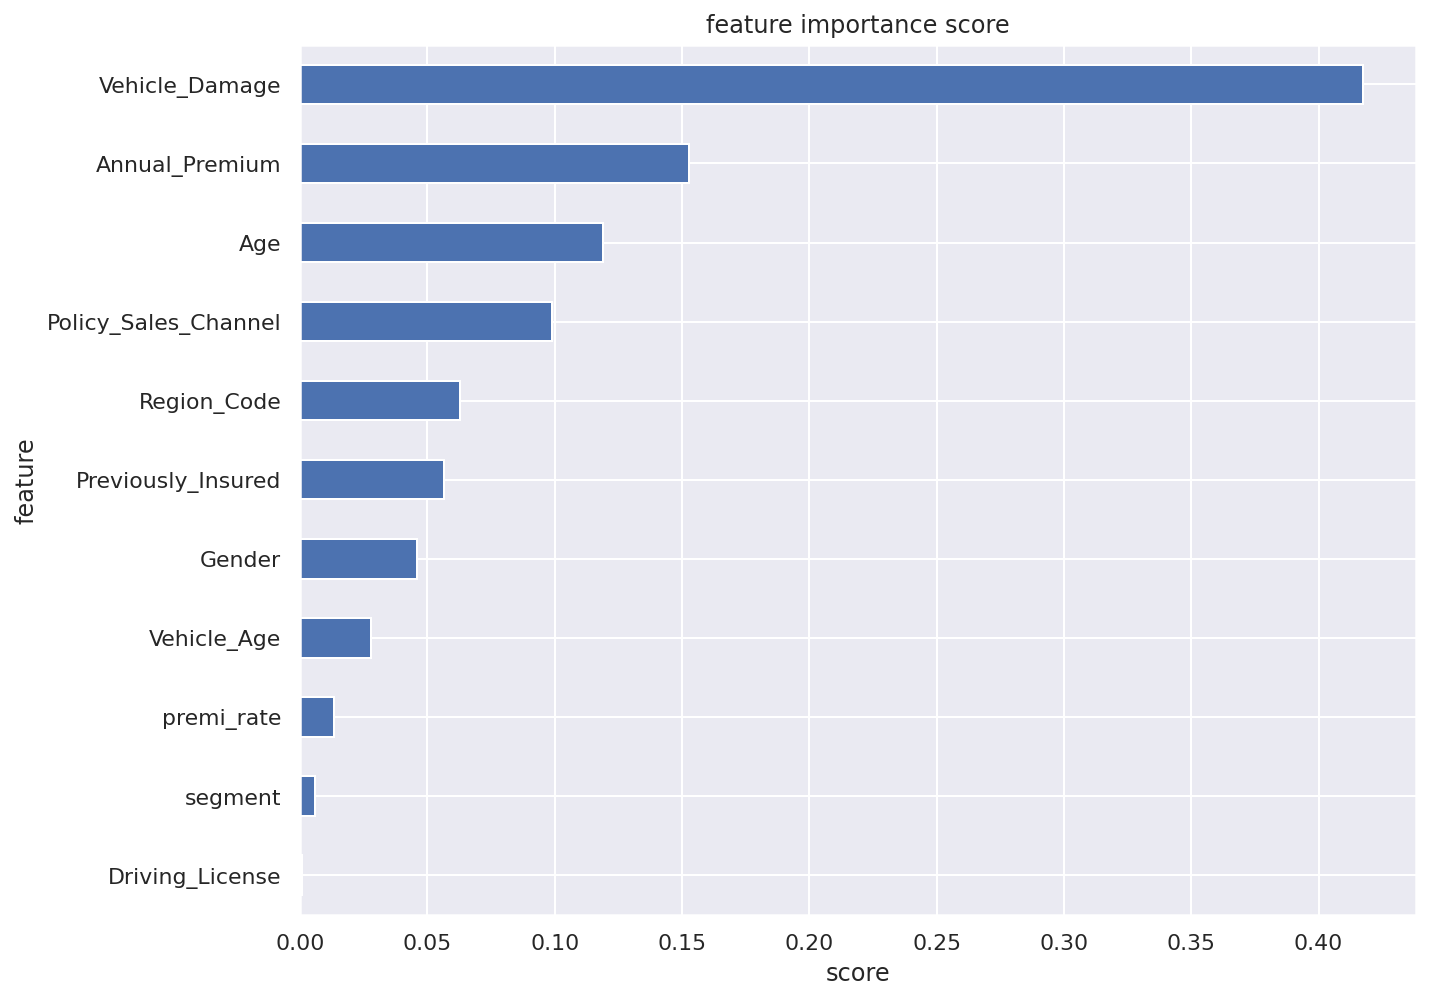

In [303]:
show_feature_importance(model.best_estimator_)

### INSIGHT

Dari hasil feature importance pada model Random Forest didapatkan top 5 feature yaitu:


1.   Vehicle Damage
2.   Annual Premium
3.   Age
4.   Policy Sales Channel
5.   Region Code

Diluar top 5 feature terdapat feature yang penting secara teori untuk model yaitu feature Previously Insured

**Business insight yang dapat diambil dari feature-feature diatas adalah:**

**1. Previously Insured** <br>
Riwayat customer apakah pernah memiliki asuransi kendaraan sebelumnya menjadi poin yang penting dalam pemodelan ini. Dari hasil EDA, didapatkan bahwa mayoritas customer yang tertarik adalah customer yang sebelumnya belum pernah memiliki asuransi kendaraan. Kita dapat memanfaatkan data customer yang sebelumnya pernah memiliki asuransi namun merespon tidak tertarik untuk menggali informasi lebih dalam. Dapat dilakukan survey yang dikirim melalui email atau melalui telepon untuk mendapatkan informasi terkait alasan/faktor yang mendasari customer tidak tertarik saat ditawarkan asuransi kendaraan bermotor lagi. Kemudian dari informasi tersebut dapat kita gunakan untuk mengembangkan produk kita agar lebih sesuai dengan kebutuhan customer.

**2. Vehicle Damage** <br>
Berdasarkan hasil EDA, mayoritas customer yang tertarik merupakan customer yang sudah pernah mengalami kerusakaan pada kendaraanya. Hal ini bisa disebabkan karena customer dengan kendaraan yang sudah mengalami kerusakan lebih aware dibandingkan yang belum mengalami kerusakan, sehingga ketertarikannya lebih tinggi. Hal ini bisa dioptimalkan dengan memberikan informasi mengenai pentingnya mengasuransikan kendaraan ataupun meningkatkan promosi, sehingga user yang tidak tertarik bisa lebih yakin dan mau mendaftar asuransi kendaraan.

**3. Policy Sales Channel** <br>
Promosi merupakan faktor yang penting dalam proses pemasaran. Policy sales channel merupakan code-code dari media pendekatan terhadap customer. Kita dapat melihat mayoritas customer yang tertarik itu di dilakukan pendekatan melalui media apa, dan juga kita dapat melihat karakteristik dari setiap customer pada setiap media pendekatan agar dalam proses promosi selanjutnya bisa lebih efektif dan tepat sasaran.

**4. Age** <br>
Dalam penetapan premi usia menjadi salah satu pertimbangan bagi aktuaria, banyak asuransi yang menetapkan premi lebih tinggi untuk customer pada usia 20-30 tahun dikarenakan customer yang usianya 20-30 tahun dinilai lebih ceroboh dan kurang berhati-hati. Berdasarkan hasil EDA, customer yang merespon tertarik mayoritas berusia 40-50 tahun. Kita dapat mengembangkan produk asuransi bagi customer yang berusia 20-30 tahun dengan premi yang lebih rendah atau mendekati premi customer yang berusia 40-50 tahun. Namun dalam pengembangan produknya memerlukan data terkait perilaku berkendara customer pada rentang usia tersebut, agar perusahaan tetap mendapatkan profit yang optimal.

**5. Annual Premium** <br>
Nilai annual premium akan mempresentasikan cakupan manfaat dari asuransinya. Semakin luas cakupan manfaat yang diberikan, maka akan semakin tinggi nilai preminya. Kita dapat mengembangkan produk dengan nilai premi yang rendah namun cakupannya cukup baik, dengan disertai persyaratan persyaratan tertentu seperti jika tidak ada claim dalam 2 tahun untuk premi tahun selanjutnya customer akan mendapatkan diskon 10-20%.

**6. Region Code** <br>
Wilayah pembelian asuransi kendaraan menjadi salah satu faktor yang penting, karena akan mempengaruhi besaran preminya. Untuk wilayah yang tidak padat lalu lintasnya maka nilai premi asuransi kendarannya akan lebih rendah. Kita dapat meningkatkan promosi pada lokasi yang lalu lintasnya tidak terlalu padat sehingga kemungkinan ketertarikan customer akan lebih tinggi karena premi yang ditawarkan tidak terlalu tinggi. <br>

Selain itu terdapat feature yang secara teori dapat dipertimbangkan untuk masuk ke dalam model yaitu : <br>
**1. Vehicle Age** <br>
Umur kendaraan merupakan salah satu hal yang penting, karena untuk kendaraan yang usianya lebih dari 2 tahun preminya akan lebih tinggi karena ada biaya tambahan lainnya (loading fee). Penambahan biaya tersebut dikarenakan faktor kesulitan merawat mobil yang sudah berumur, seperti sparepart yang sudah langka dan lain-lain. Hasil EDA pun menunjukkan bahwa mayoritas customer yang tertarik merupakan customer dengan usia kendaraan 1-2 tahun. Untuk meningkatkan customer yang tertarik kita dapat bekerja sama dengan dealer mobil dengan menawarkan premi yang rendah untuk mobil-mobil baru atau juga bekerja sama dengan bank leasing ketika ada penjualan mobil baru yang dicicil melalui bank tersebut akan mendapatkan potongan harga untuk asuransi kendaraannya.

## Feature Selection

### A. Random Forest

In [307]:
x_train_rf = x_train[['Previously_Insured', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Age', 'Annual_Premium']]
x_train_rf.head()

,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Age,Annual_Premium
4297,0,1,124,30,34885
31072,0,1,26,25,30113
209865,0,1,124,64,2630
16472,0,1,25,47,40614
567210,0,1,156,50,2630


In [308]:
x_test_rf = x_test[['Previously_Insured', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Age', 'Annual_Premium']]
x_test_rf.head()

,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Age,Annual_Premium
476632,0,1,26,44,30613
478765,0,1,147,26,22309
265359,0,1,152,22,36469
51424,0,1,124,52,47990
600948,0,1,140,28,23585


In [309]:
scaler = StandardScaler().fit(x_train_rf)
x_train_s = scaler.transform(x_train_rf)
x_test_s = scaler.transform(x_test_rf)

In [319]:
randomforest = RandomForestClassifier()
randomforest=randomforest.fit(x_train_rf, y_train)
y_pred = randomforest.predict(x_test_rf)
RF_probability = randomforest.predict_proba(x_test_rf)[:,1]

AUC_RF=roc_auc_score(y_pred,y_test)
acc_rf=accuracy_score(y_test,y_pred)
recall_rf=recall_score(y_test,y_pred)
precision_rf=precision_score(y_test,y_pred)
f1score_rf=f1_score(y_test,y_pred)

print("Accuracy Score :",accuracy_score(y_pred,y_test))
print("ROC_AUC Score :",AUC_RF)

Accuracy Score : 0.809024736321772
ROC_AUC Score : 0.8108763984659906


In [312]:
trfc = (str(randomforest.score(x_train_rf, y_train)))
tsfc = (str(randomforest.score(x_test_rf, y_test)))

print('Train score: ' + trfc)
print('Test score: ' + tsfc)

Train score: 0.9571292773578568
Test score: 0.8091015731050769


In [313]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80     97477
           1       0.79      0.85      0.82     97742

    accuracy                           0.81    195219
   macro avg       0.81      0.81      0.81    195219
weighted avg       0.81      0.81      0.81    195219



### B. Decision Tree

In [314]:
x_train_dt = x_train[['Vehicle_Damage', 'Annual_Premium', 'Age', 'Policy_Sales_Channel', 'Region_Code']]
x_train_dt.head()

,Vehicle_Damage,Annual_Premium,Age,Policy_Sales_Channel,Region_Code
4297,1,34885,30,124,28
31072,1,30113,25,26,28
209865,1,2630,64,124,8
16472,1,40614,47,25,28
567210,1,2630,50,156,41


In [315]:
x_test_dt = x_test[['Vehicle_Damage', 'Annual_Premium', 'Age', 'Policy_Sales_Channel', 'Region_Code']]
x_test_dt.head()

,Vehicle_Damage,Annual_Premium,Age,Policy_Sales_Channel,Region_Code
476632,1,30613,44,26,8
478765,1,22309,26,147,46
265359,1,36469,22,152,37
51424,1,47990,52,124,28
600948,1,23585,28,140,45


In [316]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train_dt, y_train)

y_pred = dt.predict(x_test_dt)
eval_classification(dt, x_train_dt, y_train, x_test_dt, y_test)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.81
Recall (Test Set): 0.86
F1-Score (Test Set): 0.83
AUC (test-proba): 0.84
AUC (train-proba): 1.00


In [317]:
acc_dt=accuracy_score(y_test, y_pred)
recall_dt=recall_score(y_test, y_pred)
precision_dt=precision_score(y_test, y_pred)
f1score_dt=f1_score(y_test, y_pred)
AUC_DT=roc_auc_score(y_test,y_pred)

trdt = (str(dt.score(x_train_dt, y_train)))
tsdt = (str(dt.score(x_test_dt, y_test)))

print('Train score: ' + trdt)
print('Test score: ' + tsdt)

Train score: 0.9719324974918169
Test score: 0.8303495049149929
